In [1]:
import tensorflow as tf
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Learning Rate Scheduling

  * Po ustawieniu wartości hiperparametrowych tworzymy nie trnowalną zmienną **global_step** (zainicjowaną na 0), aby śledzić aktualny numer iteracji.

  * Następnie definiujemy wykładniczo szybkość uczenia (z $\eta_0 = 0,1$ i $r = 10 000$) za pomocą funkcji 
  **Exponential_decay ()**. 
  * Następnie tworzymy optymalizator (w tym przykładzie MomentumOptimizer), wykorzystując nowej szybkości uczenia. 
  * Na koniec tworzymy operację uczenia, wywołując metodę **minimize()** optymalizatora; 
  * Ponieważ przekazujemy mu zmienną **global_step** to automatycznie otrzymamy znieniającą się szybkość 


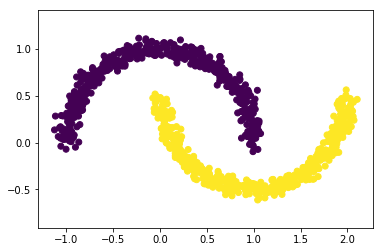

In [2]:
data_X, data_y = sklearn.datasets.make_moons(n_samples=1000, noise=.05)



plt.scatter(data_X[:,0],data_X[:,1],c=data_y)
plt.axis('equal')
plt.show()

In [3]:
n_inputs = 2
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 2

array_acc_test_g = []
array_acc_test_g_s = []

array_acc_test_momentum=[]
array_acc_test_nesterov=[]
array_acc_test_ada_grad=[]
array_acc_test_RMS_prop=[]
array_acc_test_adam=[]

learning_rate = 0.01
n_epochs = 100
batch_size = 50

In [4]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")      
        
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")   
    

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
    
init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
        array_acc_test_g.append(acc_train)    

95%  0 Train accuracy: 0.667
95%  1 Train accuracy: 0.765
95%  2 Train accuracy: 0.839
95%  3 Train accuracy: 0.834
95%  4 Train accuracy: 0.832
95%  5 Train accuracy: 0.829
95%  6 Train accuracy: 0.832
95%  7 Train accuracy: 0.839
95%  8 Train accuracy: 0.839
95%  9 Train accuracy: 0.842
95%  10 Train accuracy: 0.84
95%  11 Train accuracy: 0.843
95%  12 Train accuracy: 0.846
95%  13 Train accuracy: 0.846
95%  14 Train accuracy: 0.848
95%  15 Train accuracy: 0.851
95%  16 Train accuracy: 0.855
95%  17 Train accuracy: 0.859
95%  18 Train accuracy: 0.86
95%  19 Train accuracy: 0.862
95%  20 Train accuracy: 0.864
95%  21 Train accuracy: 0.867
95%  22 Train accuracy: 0.869
95%  23 Train accuracy: 0.874
95%  24 Train accuracy: 0.877
95%  25 Train accuracy: 0.88
95%  26 Train accuracy: 0.881
95%  27 Train accuracy: 0.884
95%  28 Train accuracy: 0.886
95%  29 Train accuracy: 0.888
95%  30 Train accuracy: 0.888
95%  31 Train accuracy: 0.888
95%  32 Train accuracy: 0.89
95%  33 Train accuracy: 

In [5]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")      
        
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")   
    

with tf.name_scope("train"):
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1/10
    global_step = tf.Variable(0, trainable=False, name="global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step,
                                               decay_steps, decay_rate)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
    
init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
        array_acc_test_g_s.append(acc_train)    

95%  0 Train accuracy: 0.857
95%  1 Train accuracy: 0.88
95%  2 Train accuracy: 0.897
95%  3 Train accuracy: 0.911
95%  4 Train accuracy: 0.914
95%  5 Train accuracy: 0.912
95%  6 Train accuracy: 0.913
95%  7 Train accuracy: 0.914
95%  8 Train accuracy: 0.919
95%  9 Train accuracy: 0.921
95%  10 Train accuracy: 0.924
95%  11 Train accuracy: 0.926
95%  12 Train accuracy: 0.932
95%  13 Train accuracy: 0.937
95%  14 Train accuracy: 0.939
95%  15 Train accuracy: 0.941
95%  16 Train accuracy: 0.944
95%  17 Train accuracy: 0.946
95%  18 Train accuracy: 0.948
95%  19 Train accuracy: 0.953
95%  20 Train accuracy: 0.956
95%  21 Train accuracy: 0.959
95%  22 Train accuracy: 0.962
95%  23 Train accuracy: 0.963
95%  24 Train accuracy: 0.963
95%  25 Train accuracy: 0.965
95%  26 Train accuracy: 0.966
95%  27 Train accuracy: 0.968
95%  28 Train accuracy: 0.969
95%  29 Train accuracy: 0.97
95%  30 Train accuracy: 0.97
95%  31 Train accuracy: 0.97
95%  32 Train accuracy: 0.97
95%  33 Train accuracy: 0

In [6]:
learning_rate = 0.01

In [7]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")      
        
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")   
    

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
    
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
        array_acc_test_momentum.append(acc_train)    
        

95%  0 Train accuracy: 0.781
95%  1 Train accuracy: 0.819
95%  2 Train accuracy: 0.854
95%  3 Train accuracy: 0.878
95%  4 Train accuracy: 0.899
95%  5 Train accuracy: 0.906
95%  6 Train accuracy: 0.908
95%  7 Train accuracy: 0.907
95%  8 Train accuracy: 0.908
95%  9 Train accuracy: 0.911
95%  10 Train accuracy: 0.916
95%  11 Train accuracy: 0.919
95%  12 Train accuracy: 0.919
95%  13 Train accuracy: 0.923
95%  14 Train accuracy: 0.929
95%  15 Train accuracy: 0.933
95%  16 Train accuracy: 0.937
95%  17 Train accuracy: 0.938
95%  18 Train accuracy: 0.942
95%  19 Train accuracy: 0.944
95%  20 Train accuracy: 0.946
95%  21 Train accuracy: 0.948
95%  22 Train accuracy: 0.952
95%  23 Train accuracy: 0.956
95%  24 Train accuracy: 0.957
95%  25 Train accuracy: 0.96
95%  26 Train accuracy: 0.962
95%  27 Train accuracy: 0.962
95%  28 Train accuracy: 0.963
95%  29 Train accuracy: 0.965
95%  30 Train accuracy: 0.967
95%  31 Train accuracy: 0.968
95%  32 Train accuracy: 0.969
95%  33 Train accurac

In [8]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")      
        
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")   

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9, use_nesterov=True)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
    
init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
        array_acc_test_nesterov.append(acc_train)    
        

95%  0 Train accuracy: 0.842
95%  1 Train accuracy: 0.859
95%  2 Train accuracy: 0.879
95%  3 Train accuracy: 0.903
95%  4 Train accuracy: 0.909
95%  5 Train accuracy: 0.907
95%  6 Train accuracy: 0.907
95%  7 Train accuracy: 0.912
95%  8 Train accuracy: 0.915
95%  9 Train accuracy: 0.917
95%  10 Train accuracy: 0.919
95%  11 Train accuracy: 0.922
95%  12 Train accuracy: 0.927
95%  13 Train accuracy: 0.932
95%  14 Train accuracy: 0.937
95%  15 Train accuracy: 0.938
95%  16 Train accuracy: 0.939
95%  17 Train accuracy: 0.943
95%  18 Train accuracy: 0.945
95%  19 Train accuracy: 0.946
95%  20 Train accuracy: 0.949
95%  21 Train accuracy: 0.952
95%  22 Train accuracy: 0.956
95%  23 Train accuracy: 0.957
95%  24 Train accuracy: 0.96
95%  25 Train accuracy: 0.962
95%  26 Train accuracy: 0.962
95%  27 Train accuracy: 0.963
95%  28 Train accuracy: 0.964
95%  29 Train accuracy: 0.966
95%  30 Train accuracy: 0.967
95%  31 Train accuracy: 0.968
95%  32 Train accuracy: 0.969
95%  33 Train accurac

In [9]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")      
        
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")   

with tf.name_scope("train"):
    optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
    
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
        array_acc_test_ada_grad.append(acc_train)    
        

95%  0 Train accuracy: 0.84
95%  1 Train accuracy: 0.836
95%  2 Train accuracy: 0.841
95%  3 Train accuracy: 0.846
95%  4 Train accuracy: 0.853
95%  5 Train accuracy: 0.857
95%  6 Train accuracy: 0.863
95%  7 Train accuracy: 0.875
95%  8 Train accuracy: 0.88
95%  9 Train accuracy: 0.888
95%  10 Train accuracy: 0.89
95%  11 Train accuracy: 0.891
95%  12 Train accuracy: 0.895
95%  13 Train accuracy: 0.9
95%  14 Train accuracy: 0.901
95%  15 Train accuracy: 0.906
95%  16 Train accuracy: 0.91
95%  17 Train accuracy: 0.911
95%  18 Train accuracy: 0.914
95%  19 Train accuracy: 0.912
95%  20 Train accuracy: 0.913
95%  21 Train accuracy: 0.913
95%  22 Train accuracy: 0.913
95%  23 Train accuracy: 0.913
95%  24 Train accuracy: 0.913
95%  25 Train accuracy: 0.913
95%  26 Train accuracy: 0.915
95%  27 Train accuracy: 0.916
95%  28 Train accuracy: 0.917
95%  29 Train accuracy: 0.919
95%  30 Train accuracy: 0.92
95%  31 Train accuracy: 0.922
95%  32 Train accuracy: 0.923
95%  33 Train accuracy: 0.9

In [10]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")      
        
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")   
    

with tf.name_scope("train"):
    optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate,
                                      momentum=0.9, decay=0.9, epsilon=1e-10)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
    
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
        array_acc_test_RMS_prop.append(acc_train)    
        

95%  0 Train accuracy: 0.831
95%  1 Train accuracy: 0.903
95%  2 Train accuracy: 0.917
95%  3 Train accuracy: 0.983
95%  4 Train accuracy: 0.991
95%  5 Train accuracy: 0.989
95%  6 Train accuracy: 0.989
95%  7 Train accuracy: 0.99
95%  8 Train accuracy: 0.991
95%  9 Train accuracy: 0.992
95%  10 Train accuracy: 0.993
95%  11 Train accuracy: 0.993
95%  12 Train accuracy: 0.993
95%  13 Train accuracy: 0.994
95%  14 Train accuracy: 0.994
95%  15 Train accuracy: 0.994
95%  16 Train accuracy: 0.994
95%  17 Train accuracy: 0.994
95%  18 Train accuracy: 0.994
95%  19 Train accuracy: 0.994
95%  20 Train accuracy: 0.994
95%  21 Train accuracy: 0.994
95%  22 Train accuracy: 0.994
95%  23 Train accuracy: 0.994
95%  24 Train accuracy: 0.994
95%  25 Train accuracy: 0.994
95%  26 Train accuracy: 0.994
95%  27 Train accuracy: 0.994
95%  28 Train accuracy: 0.994
95%  29 Train accuracy: 0.994
95%  30 Train accuracy: 0.994
95%  31 Train accuracy: 0.994
95%  32 Train accuracy: 0.994
95%  33 Train accurac

In [11]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")      
        
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")   
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
    
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
        array_acc_test_adam.append(acc_train)    
        

95%  0 Train accuracy: 0.924
95%  1 Train accuracy: 0.969
95%  2 Train accuracy: 0.974
95%  3 Train accuracy: 0.975
95%  4 Train accuracy: 0.975
95%  5 Train accuracy: 0.974
95%  6 Train accuracy: 0.974
95%  7 Train accuracy: 0.974
95%  8 Train accuracy: 0.974
95%  9 Train accuracy: 0.975
95%  10 Train accuracy: 0.975
95%  11 Train accuracy: 0.975
95%  12 Train accuracy: 0.975
95%  13 Train accuracy: 0.975
95%  14 Train accuracy: 0.975
95%  15 Train accuracy: 0.975
95%  16 Train accuracy: 0.975
95%  17 Train accuracy: 0.975
95%  18 Train accuracy: 0.975
95%  19 Train accuracy: 0.975
95%  20 Train accuracy: 0.975
95%  21 Train accuracy: 0.975
95%  22 Train accuracy: 0.975
95%  23 Train accuracy: 0.975
95%  24 Train accuracy: 0.975
95%  25 Train accuracy: 0.975
95%  26 Train accuracy: 0.975
95%  27 Train accuracy: 0.976
95%  28 Train accuracy: 0.976
95%  29 Train accuracy: 0.976
95%  30 Train accuracy: 0.976
95%  31 Train accuracy: 0.976
95%  32 Train accuracy: 0.976
95%  33 Train accura

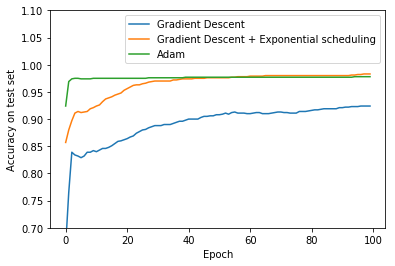

In [12]:
plt.figure()
plt.plot(array_acc_test_g, label='Gradient Descent')
plt.plot(array_acc_test_g_s, label='Gradient Descent + Exponential scheduling')
plt.plot(array_acc_test_adam, label='Adam')
plt.ylim(0.7,1.1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy on test set')
plt.legend()
plt.show()

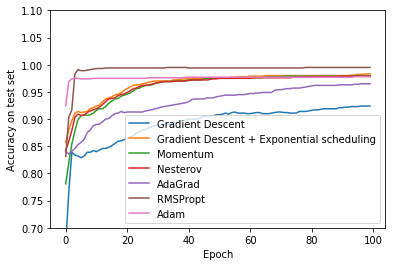

In [13]:
plt.figure()
plt.plot(array_acc_test_g, label='Gradient Descent')
plt.plot(array_acc_test_g_s, label='Gradient Descent + Exponential scheduling')
plt.plot(array_acc_test_momentum, label='Momentum')
plt.plot(array_acc_test_nesterov, label='Nesterov')
plt.plot(array_acc_test_ada_grad, label='AdaGrad')
plt.plot(array_acc_test_RMS_prop, label='RMSPropt')
plt.plot(array_acc_test_adam, label='Adam')
plt.ylim(0.7,1.1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy on test set')
plt.legend()
plt.show()